In [1]:
#importing the necessary libraries
import tensorflow as tf
print("The tensorflow version is "+ str(tf.__version__))
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
print("The open cv version is "+ str(cv2.__version__))
import time
import math
import h5py
from tensorflow.keras.layers import InputLayer,Flatten,Conv2D,Dense,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.layers import MaxPooling2D,GlobalMaxPooling2D,AveragePooling2D,GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model,Sequential
import h5py

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


The tensorflow version is 1.12.0
The open cv version is 3.4.4


In [2]:
#Now loading the dataset which is present in the h5 format
filenameTrain = 'train_happy.h5'
filenameTest = 'test_happy.h5'
fTrain = h5py.File(filenameTrain, 'r')
fTest=h5py.File(filenameTest,'r')
X_train=fTrain["train_set_x"].value
Y_train=fTrain["train_set_y"].value
X_test=fTest["test_set_x"].value
Y_test=fTest["test_set_y"].value
#Now printing the shapes of the training as well as the test data
print("The number of training examples are {}".format(X_train.shape[0]))
print("The number of test examples are {}".format(X_test.shape[0]))
print("The shape of training X is {}".format(X_train.shape))
print("The shape of training Y is {}".format(Y_train.shape))
print("The shape of testing X is {}".format(X_test.shape))
print("The shape of testing Y is {}".format(Y_test.shape))
# The output is a binaryoutput stating whether a person is happy or not?

The number of training examples are 600
The number of test examples are 150
The shape of training X is (600, 64, 64, 3)
The shape of training Y is (600,)
The shape of testing X is (150, 64, 64, 3)
The shape of testing Y is (150,)


The person is 1 i.e he is smiling


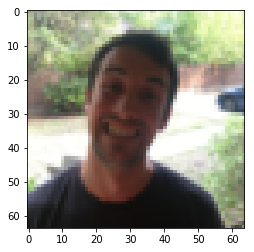

In [3]:
#displaging an random example
index=5
print(f"The person is {Y_train[index]} i.e he is smiling")
plt.imshow(X_train[index,:])
plt.show()

In [4]:
#Now let's standarize the input with 0 mean
X_train=X_train/255
X_test=X_test/255

In [5]:
#Let's define our nn model
#this will be a quick dirty model where we will use the blocks of
# Input-->(ZERO PADDOING-CONV2D-BN-RELU-MXPOOL)X3-->FLATTEN-->DENSE
#we will also implement the tensorboard
ishape=X_train.shape[1:]
epochs=[250]
for ep in epochs:
    NAME="MODEL WITH {} epochs @ {} time.".format(ep,int(time.time()))
    tensorboard=TensorBoard(log_dir="logs/{}".format(NAME))
    model=Sequential()
    model.add(InputLayer(ishape))
    #The first block which we will always execute
    model.add(ZeroPadding2D(padding=(3,3)))
    model.add(Conv2D(filters=16,kernel_size=(7,7),strides=(1,1)))
    model.add(BatchNormalization(axis=3))
    model.add(Activation("relu"))
    model.add(AveragePooling2D(pool_size=(2,2)))
    #Implementing this piece of block total-1 times
    model.add(ZeroPadding2D(padding=(3,3)))
    model.add(Conv2D(filters=16,kernel_size=(7,7),strides=(1,1)))
    model.add(BatchNormalization(axis=3))
    model.add(Activation("relu"))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(ZeroPadding2D(padding=(3,3)))
    model.add(Conv2D(filters=16,kernel_size=(7,7),strides=(1,1)))
    model.add(BatchNormalization(axis=3))
    model.add(Activation("relu"))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(ZeroPadding2D(padding=(3,3)))
    model.add(Conv2D(filters=16,kernel_size=(7,7),strides=(1,1)))
    model.add(BatchNormalization(axis=3))
    model.add(Activation("relu"))
    model.add(AveragePooling2D(pool_size=(2,2)))
    #Now we will implement the FC layers
    model.add(Flatten())
    model.add(Dense(1,activation="sigmoid"))
    adam_opt=keras.optimizers.Adam(lr=0.01)
    #model.load_weights("weights.best.hdf5")
    model.compile(optimizer=adam_opt,metrics=["accuracy"],loss="binary_crossentropy")
    # checkpoint
    filepath="Model with epoch {}.hdf5".format(ep)
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint,tensorboard]
    model.fit(X_train,Y_train,batch_size=16,epochs=ep,shuffle=True,validation_split=0.1,callbacks=callbacks_list)

Train on 540 samples, validate on 60 samples
Epoch 1/250
528/540 [============================>.] - ETA: 0s - loss: 0.7230 - acc: 0.5871
Epoch 00001: val_acc improved from -inf to 0.61667, saving model to Model with epoch 250.hdf5
540/540 [==============================] - 7s 13ms/step - loss: 0.7168 - acc: 0.5944 - val_loss: 3.3166 - val_acc: 0.6167
Epoch 2/250
528/540 [============================>.] - ETA: 0s - loss: 0.5218 - acc: 0.7348
Epoch 00002: val_acc did not improve from 0.61667
540/540 [==============================] - 3s 5ms/step - loss: 0.5217 - acc: 0.7352 - val_loss: 7.8298 - val_acc: 0.4833
Epoch 3/250
528/540 [============================>.] - ETA: 0s - loss: 0.4198 - acc: 0.8220
Epoch 00003: val_acc did not improve from 0.61667
540/540 [==============================] - 3s 5ms/step - loss: 0.4238 - acc: 0.8185 - val_loss: 5.1351 - val_acc: 0.5000
Epoch 4/250
528/540 [============================>.] - ETA: 0s - loss: 0.4033 - acc: 0.8201- ETA: 2s - l
Epoch 00004: val

Epoch 31/250
528/540 [============================>.] - ETA: 0s - loss: 0.1188 - acc: 0.9621
Epoch 00031: val_acc did not improve from 0.96667
540/540 [==============================] - 2s 4ms/step - loss: 0.1192 - acc: 0.9611 - val_loss: 0.8828 - val_acc: 0.7667
Epoch 32/250
528/540 [============================>.] - ETA: 0s - loss: 0.0876 - acc: 0.9792
Epoch 00032: val_acc did not improve from 0.96667
540/540 [==============================] - 2s 4ms/step - loss: 0.0858 - acc: 0.9796 - val_loss: 0.2551 - val_acc: 0.8833
Epoch 33/250
528/540 [============================>.] - ETA: 0s - loss: 0.0945 - acc: 0.9716
Epoch 00033: val_acc did not improve from 0.96667
540/540 [==============================] - 3s 5ms/step - loss: 0.0926 - acc: 0.9722 - val_loss: 0.0835 - val_acc: 0.9667
Epoch 34/250
528/540 [============================>.] - ETA: 0s - loss: 0.1032 - acc: 0.9678
Epoch 00034: val_acc did not improve from 0.96667
540/540 [==============================] - 3s 6ms/step - loss: 0.

540/540 [==============================] - 3s 5ms/step - loss: 0.0493 - acc: 0.9815 - val_loss: 0.0853 - val_acc: 0.9667
Epoch 61/250
528/540 [============================>.] - ETA: 0s - loss: 0.0499 - acc: 0.9830
Epoch 00061: val_acc did not improve from 0.98333
540/540 [==============================] - 2s 5ms/step - loss: 0.0488 - acc: 0.9833 - val_loss: 0.0704 - val_acc: 0.9833
Epoch 62/250
528/540 [============================>.] - ETA: 0s - loss: 0.0637 - acc: 0.9773
Epoch 00062: val_acc did not improve from 0.98333
540/540 [==============================] - 3s 5ms/step - loss: 0.0633 - acc: 0.9778 - val_loss: 0.6215 - val_acc: 0.7667
Epoch 63/250
528/540 [============================>.] - ETA: 0s - loss: 0.0445 - acc: 0.9886
Epoch 00063: val_acc did not improve from 0.98333
540/540 [==============================] - 4s 7ms/step - loss: 0.0436 - acc: 0.9889 - val_loss: 0.3504 - val_acc: 0.8333
Epoch 64/250
528/540 [============================>.] - ETA: 0s - loss: 0.0324 - acc: 0

528/540 [============================>.] - ETA: 0s - loss: 0.0363 - acc: 0.9830
Epoch 00091: val_acc did not improve from 1.00000
540/540 [==============================] - 2s 4ms/step - loss: 0.0355 - acc: 0.9833 - val_loss: 0.3407 - val_acc: 0.9000
Epoch 92/250
528/540 [============================>.] - ETA: 0s - loss: 0.0286 - acc: 0.9905
Epoch 00092: val_acc did not improve from 1.00000
540/540 [==============================] - 2s 4ms/step - loss: 0.0287 - acc: 0.9907 - val_loss: 0.1801 - val_acc: 0.9500
Epoch 93/250
528/540 [============================>.] - ETA: 0s - loss: 0.0246 - acc: 0.9943
Epoch 00093: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0241 - acc: 0.9944 - val_loss: 0.4684 - val_acc: 0.8833
Epoch 94/250
528/540 [============================>.] - ETA: 0s - loss: 0.0176 - acc: 0.9924
Epoch 00094: val_acc did not improve from 1.00000
540/540 [==============================] - 4s 7ms/step - loss: 0.0173 - acc: 0

Epoch 122/250
528/540 [============================>.] - ETA: 0s - loss: 0.0133 - acc: 0.9962
Epoch 00122: val_acc did not improve from 1.00000
540/540 [==============================] - 2s 5ms/step - loss: 0.0130 - acc: 0.9963 - val_loss: 0.1037 - val_acc: 0.9667
Epoch 123/250
528/540 [============================>.] - ETA: 0s - loss: 0.0181 - acc: 0.9924
Epoch 00123: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0178 - acc: 0.9926 - val_loss: 0.1624 - val_acc: 0.9833
Epoch 124/250
528/540 [============================>.] - ETA: 0s - loss: 0.0250 - acc: 0.9943
Epoch 00124: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0267 - acc: 0.9926 - val_loss: 0.3069 - val_acc: 0.9000
Epoch 125/250
528/540 [============================>.] - ETA: 0s - loss: 0.0468 - acc: 0.9848
Epoch 00125: val_acc did not improve from 1.00000
540/540 [==============================] - 2s 4ms/step - loss

Epoch 153/250
528/540 [============================>.] - ETA: 0s - loss: 0.0130 - acc: 0.9962
Epoch 00153: val_acc did not improve from 1.00000
540/540 [==============================] - 2s 5ms/step - loss: 0.0130 - acc: 0.9963 - val_loss: 0.0160 - val_acc: 1.0000
Epoch 154/250
528/540 [============================>.] - ETA: 0s - loss: 0.0193 - acc: 0.9981
Epoch 00154: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0189 - acc: 0.9981 - val_loss: 0.0581 - val_acc: 0.9833
Epoch 155/250
528/540 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.9981
Epoch 00155: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0086 - acc: 0.9981 - val_loss: 0.1273 - val_acc: 0.9833
Epoch 156/250
528/540 [============================>.] - ETA: 0s - loss: 0.0068 - acc: 0.9981
Epoch 00156: val_acc did not improve from 1.00000
540/540 [==============================] - 2s 5ms/step - loss

Epoch 184/250
528/540 [============================>.] - ETA: 0s - loss: 0.0091 - acc: 0.9962
Epoch 00184: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0089 - acc: 0.9963 - val_loss: 0.0217 - val_acc: 1.0000
Epoch 185/250
528/540 [============================>.] - ETA: 0s - loss: 0.0223 - acc: 0.9886
Epoch 00185: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0248 - acc: 0.9870 - val_loss: 2.0378 - val_acc: 0.7167
Epoch 186/250
528/540 [============================>.] - ETA: 0s - loss: 0.0353 - acc: 0.9867
Epoch 00186: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0346 - acc: 0.9870 - val_loss: 0.0322 - val_acc: 0.9833
Epoch 187/250
528/540 [============================>.] - ETA: 0s - loss: 0.0114 - acc: 0.9981- ETA: 0s - loss: 0.0121 - acc
Epoch 00187: val_acc did not improve from 1.00000
540/540 [======================

Epoch 215/250
528/540 [============================>.] - ETA: 0s - loss: 0.0071 - acc: 0.9981
Epoch 00215: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0069 - acc: 0.9981 - val_loss: 0.1899 - val_acc: 0.9667
Epoch 216/250
528/540 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.9981
Epoch 00216: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.0624 - val_acc: 0.9833
Epoch 217/250
528/540 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.9981
Epoch 00217: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 6ms/step - loss: 0.0050 - acc: 0.9981 - val_loss: 0.0464 - val_acc: 0.9667
Epoch 218/250
528/540 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.9981
Epoch 00218: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss

Epoch 246/250
528/540 [============================>.] - ETA: 0s - loss: 0.0123 - acc: 0.9962
Epoch 00246: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0120 - acc: 0.9963 - val_loss: 0.0733 - val_acc: 0.9500
Epoch 247/250
528/540 [============================>.] - ETA: 0s - loss: 0.0166 - acc: 0.9981
Epoch 00247: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0162 - acc: 0.9981 - val_loss: 0.0744 - val_acc: 0.9667
Epoch 248/250
528/540 [============================>.] - ETA: 0s - loss: 0.0065 - acc: 0.9981
Epoch 00248: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss: 0.0063 - acc: 0.9981 - val_loss: 0.0363 - val_acc: 0.9667
Epoch 249/250
528/540 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.9981
Epoch 00249: val_acc did not improve from 1.00000
540/540 [==============================] - 3s 5ms/step - loss

In [6]:
##USE THIS FOR DATA AUGMENTATION##
"""from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zca_whitening=True)
datagen.fit(X_train)
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=300)
                    model.evaluate(X_test,Y_test)"""

'from tensorflow.keras.preprocessing.image import ImageDataGenerator\ndatagen = ImageDataGenerator(\n    featurewise_center=True,\n    featurewise_std_normalization=True,\n    rotation_range=3,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    horizontal_flip=True,\n    zca_whitening=True)\ndatagen.fit(X_train)\nmodel.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),\n                    steps_per_epoch=len(X_train) / 32, epochs=300)\n                    model.evaluate(X_test,Y_test)'

In [8]:
#USE THIS IF USING MULTIPLE EPOCHS
#epochs=[100,150,200,250,300,1000]
model.load_weights("Model with epoch 250.hdf5")
model.evaluate(X_test,Y_test)

150/150 [==============================] - 0s 813us/step


[0.1329894178112348, 0.9733333309491475]